# Project 2 Part 2: Web Scraped Data Analysis and Visualizations
### Matthew Moskal
### 11/18/25

# Section 1
#### Reading in important libraries such as pandas and checking for a response from the parent page to make sure there are no errors with webpage access

In [119]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [8]:
url='https://geometry-dash-fan.fandom.com/wiki/Geometry_Dash_Fan_Wiki'
response = requests.get(url)
status = response.status_code
if status == 200:
    print("Page status good.")
else:
    print(f"Oops! Received status code {status}")

Page status good.


# Section 2
#### This section addresses my first question for this project: What are the verification dates of some of Geometry Dash's most famous levels, and how do they compare to their current list placements?

In [143]:
# Verification Date of Bloodbath (Currently the 668th hardest level according to aredl.net)
url = 'https://geometry-dash-fan.fandom.com/wiki/Bloodbath'
response = requests.get(url)
name = url.split("wiki/")[-1] #Extracting the level name from the URL
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p') #parsing all p tags on the webpage

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I) #using a regular expression to find patterns (pat) within the p tag. I look for either 1 or 2 digits first, which is the day of the month. I check for a space in between, and then
# I look for the month of the year using character checks. I look for another space after, followed by four more digits. This regex will find results that match the format Day Month Year.

# To further filter the date down, I am now checking for text with the word verified in it, to make sure I am parsing dates that are actually the verification dates, and not random dates from the rest of the website.
for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring = m.group(1)
            print(datestring)
            break # I break after the first match, as through my browsing of the site, I have realized that the first date after the word verified is always the verification date, so there isn't a need to parse further and overcomplicate things

12 August 2015


In [151]:
# Verification Date of Artificial Ascent (Currently the 403rd hardest level according to aredl.net)
url = 'https://geometry-dash-fan.fandom.com/wiki/Artificial_Ascent'
response = requests.get(url)
name2 = url.split("wiki/")[-1]
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p')

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I)

for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring2 = m.group(1)
            print(datestring2)
            break

11 December 2016


In [144]:
# Verification Date of Yatagarasu (Currently the 289th hardest level according to aredl.net)
url = 'https://geometry-dash-fan.fandom.com/wiki/Yatagarasu'
response = requests.get(url)
name3 = url.split("wiki/")[-1]
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p')

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I)

for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring3 = m.group(1)
            print(datestring3)
            break

13 January 2017


In [145]:
# Verification Date of Bloodlust (Currently the 176th hardest level according to aredl.net)
url = 'https://geometry-dash-fan.fandom.com/wiki/Bloodlust'
response = requests.get(url)
name4 = url.split("wiki/")[-1]
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p')

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I)

for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring4 = m.group(1)
            print(datestring4)
            break

20 February 2018


In [146]:
# Verification Date of Zodiac (Currently the 96th hardest level according to pointercrate.com)
url = 'https://geometry-dash-fan.fandom.com/wiki/Zodiac'
response = requests.get(url)
name5 = url.split("wiki/")[-1]
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p')

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I)

for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring5 = m.group(1)
            print(datestring5)
            break

28 January 2019


In [147]:
# Verification Date of Tartarus (Currently the 60th hardest level according to pointercrate.com)
url = 'https://geometry-dash-fan.fandom.com/wiki/Tartarus'
response = requests.get(url)
name6 = url.split("wiki/")[-1]
soup = bs(response.text, 'html.parser')
tags = soup.find_all('p')

pat = re.compile(r'\b(\d{1,2}\s+[A-Za-z]+\s+\d{4})\b', re.I)

for p in tags:
    t = p.get_text(" ", strip=True)
    if 'verified' in t.lower():
        m = pat.search(t)
        if m:
            datestring6 = m.group(1)
            print(datestring6)
            break

6 January 2020


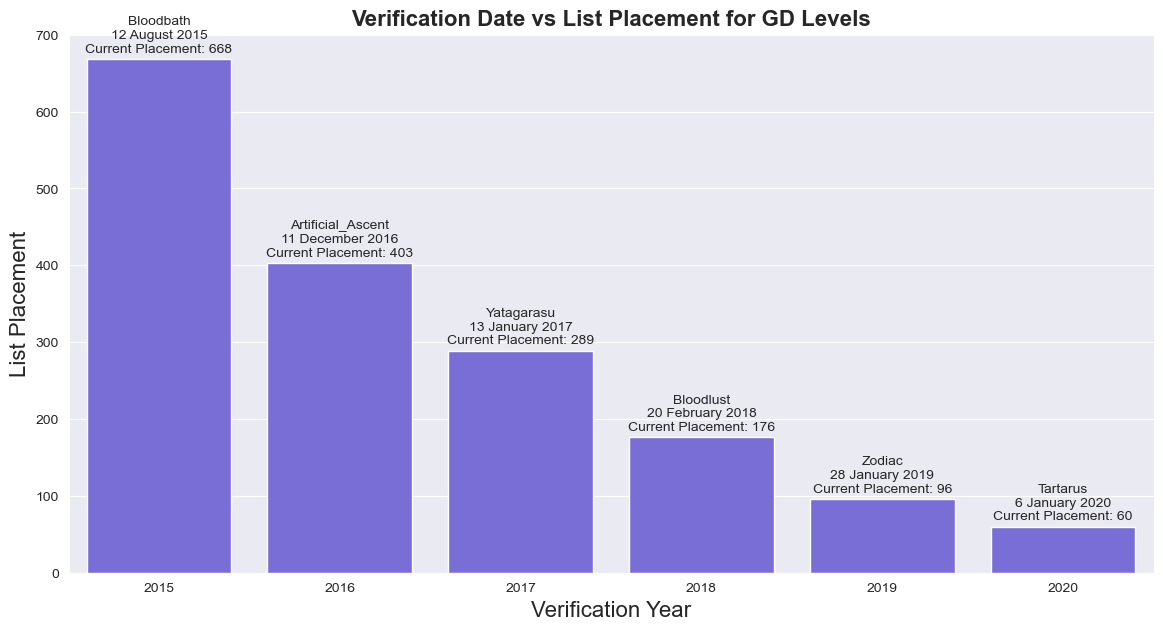

In [148]:
# Now I graph my results. I put my level names, dates, and difficulties in arrays first
levels = [name, name2, name3, name4, name5, name6]
datestrings = [datestring, datestring2, datestring3, datestring4, datestring5, datestring6]
difficulties = [668, 403, 289, 176, 96, 60]

years = [ds.split()[-1] for ds in datestrings] # I split off just the years for each level to ensure easy X-axis ordering without the clutter of managing the months and days as well

# Styling the graph for better appearance
plt.figure(figsize=(14,7))
sns.set_style("darkgrid")  
axis = sns.barplot(x=years, y=difficulties, color="#6c5ce7")

# Displaying the level name, verification date and current list placement for each level entry
for i, (lvl, date, diff) in enumerate(zip(levels, datestrings, difficulties)):
    axis.text(
        i, diff + 5, 
        f"{lvl}\n{date}\nCurrent Placement: {diff}", 
        ha='center', va='bottom', fontsize=10
    )

# Labeling and displaying graph
plt.xlabel("Verification Year", fontsize=16)
plt.ylabel("List Placement", fontsize=16)
plt.title("Verification Date vs List Placement for GD Levels", fontsize=16, fontweight='bold')
plt.show()

#### Conclusion: There is an inverse exponential relationship between the verification dates of levels and their list placements. This makes a lot of sense. As a level gets older, many more levels will get placed above it, and as the skill ceiling moves higher and higher, the level falls further exponentially due to exponentially more levels being placed above it. On the contrary, newer levels placed further up on the list do not yet experience this drastic fall, as levels placed above levels already so highly placed (and thus more exponentially more difficult) are way less likely to happen on such a regular basis than with levels placed lower on the list.

# Section 3
#### This section addresses my second question for this project: How do the attempt counts compare for the first 10 victors of one of my favorite extreme demons, Cold Sweat?

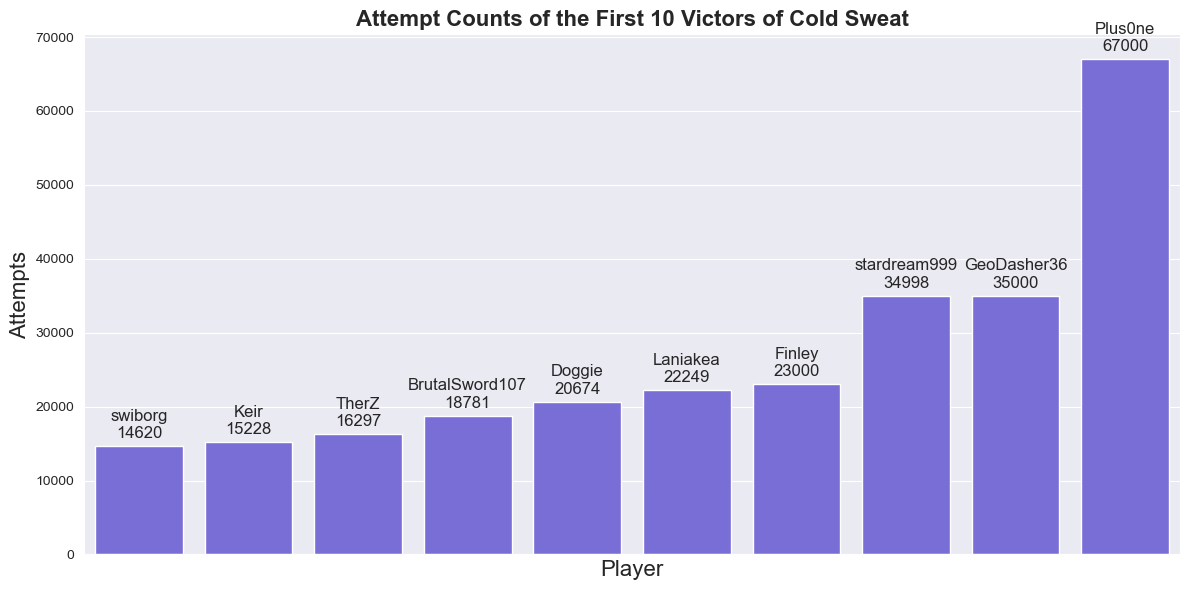

In [153]:
url='https://geometry-dash-fan.fandom.com/wiki/Cold_Sweat'
response = requests.get(url)
page = response.text
soup = bs(page)
tags = soup.find_all("td")
text = [td.get_text(strip=True) for td in tags]

result = []

for i, item in enumerate(text): # This code was generated by ChatGPT to iterate through my results set from the find_all function and extract just the player name and attempt count, subdividing them into smaller arrays for later plotting
    if item.isdigit() and 1 <= int(item) <= 10: 
        player_name = text[i + 1]
        attempts = text[i + 3]
        result.append([player_name, attempts])

# Here I am cleaning the results set that was given back to me
cleanedresult = []
for player, attempts in result:
    cleaned = int(attempts.replace("~","").replace(",","")) # replacing, as some of the attempt counts contain characters that hinder integer casting
    cleanedresult.append([player, cleaned]) 

cleanedresult.sort(key=lambda x: x[1]) # This code was generated by ChatGPT and sorts the array in ascending order by attempts to make the graph look nicer

# Setting axis
players = [x[0] for x in cleanedresult]
attempts = [x[1] for x in cleanedresult]

plt.figure(figsize=(12,6))
sns.barplot(x=players, y=attempts, color="#6c5ce7")

# Code for displaying player name and attempt count above their respective bars
for i, (player, attempt) in enumerate(zip(players, attempts)):
    plt.text(i, attempt + max(attempts)*0.01, f"{player}\n{attempt}", ha='center', va='bottom', fontsize=12)

# Labeling graph and displaying
plt.xticks([])
plt.xlabel("Player", fontsize=16)
plt.ylabel("Attempts", fontsize=16)
plt.title("Attempt Counts of the First 10 Victors of Cold Sweat", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Conclusion: Cold Sweat seems to be a level that most players at that skill level can beat in around 20,000 attempts. The level is currently placed at 110th on the Demonlist via pointercrate.com, making it an extremely challenging level and an incredible completion for anyone who beats it. However, there is actually a bit of variation in this dataset, which is exactly what I was looking for in a dataset like this. Anomalies in attempt count, such as the one from the player Plus0ne with 67,000 attempts on the level, can come from a few variables, all of which are present in the Geometry Dash community. The first possibility for this heightened attempt count is the possibility of the player "jumping" to Cold Sweat, which means taking a vast leap in difficulty to a new level, an extreme challenge. Another possibility is the fact that the player may have "dropped" (stopped playing) the level for a while and had to relearn it when picking it back up, which could have driven the count up vastly. An alternative idea to explain this heightened attempt count is the simple fact that Plus0ne was an unlucky victor and struggled heavily with the level.

# Section 4
#### This section addresses my third question for this project: What are the attempt counts for the verifiers of each level in the top 10, and is there a correlation between the difficulty of a level and the amount of attempts it takes? 

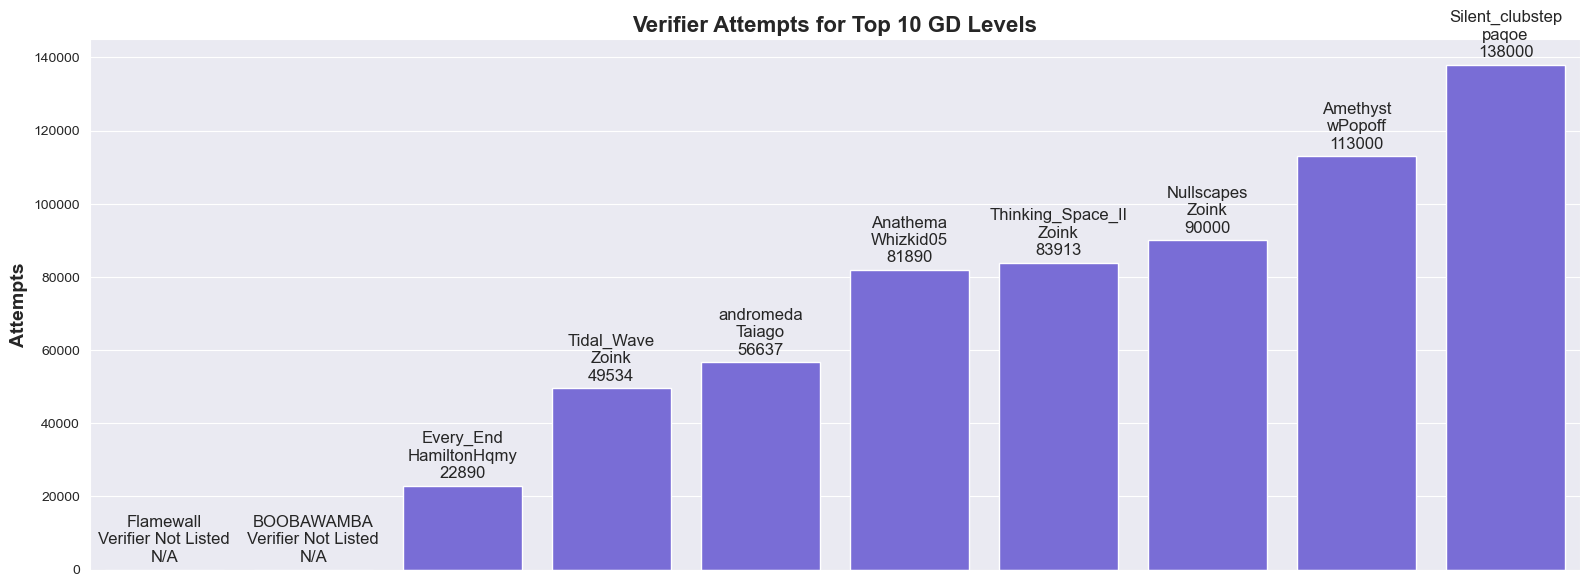

In [297]:
urls = [
    "https://geometry-dash-fan.fandom.com/wiki/Thinking_Space_II",
    "https://geometry-dash-fan.fandom.com/wiki/Amethyst",
    "https://geometry-dash-fan.fandom.com/wiki/Flamewall",
    "https://geometry-dash-fan.fandom.com/wiki/Tidal_Wave",
    "https://geometry-dash-fan.fandom.com/wiki/Nullscapes",
    "https://geometry-dash-fan.fandom.com/wiki/BOOBAWAMBA",
    "https://geometry-dash-fan.fandom.com/wiki/Every_End",
    "https://geometry-dash-fan.fandom.com/wiki/andromeda",
    "https://geometry-dash-fan.fandom.com/wiki/Silent_clubstep",
    "https://geometry-dash-fan.fandom.com/wiki/Anathema"
]

results = []

# Scrape each level
for url in urls:
    level = url.split("/wiki/")[-1]
    response = requests.get(url)
    soup = bs(response.text, "html.parser")
    
    tags = soup.find_all("td")
    text = [td.get_text(strip=True) for td in tags]
    
    verifier = None
    verifierattempts = None
    
    for i, item in enumerate(text):
        if "Verifier" in item:
            verifier = text[i + 1]
            try:
                verifierattempts = int(text[i + 3].replace("~","").replace(",","").replace(">","")) #cleaning attempt count to make it a pure integer
            except:
                verifierattempts = 0
            break

    # handling special cases where the verifier is not specified
    if verifier is None:
        verifier = "Verifier Not Listed"
    if verifierattempts is None:
        verifierattempts = 0
    
    results.append([level, verifier, verifierattempts])

#Sorting results and assigning axis
results.sort(key=lambda x: x[2])
levels = [x[0] for x in results]
verifiers = [x[1] for x in results]
attempts = [x[2] for x in results]

plt.figure(figsize=(16,6))
sns.barplot(x=levels, y=attempts, color="#6c5ce7")

# Annotate each bar with the level name, verifier, and attempts
for i, (level, verifier, attempt) in enumerate(zip(levels, verifiers, attempts)):
    display_attempt = attempt if attempt > 0 else "N/A"
    plt.text(i, attempt + max(attempts)*0.01, f"{level}\n{verifier}\n{display_attempt}",
             ha='center', va='bottom', fontsize=12)

#label axis and graph
plt.xticks([])
plt.ylabel("Attempts", fontsize=14, fontweight='bold')
plt.title("Verifier Attempts for Top 10 GD Levels", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Conclusion: There is no correlation between the difficulty of a level in the top 10 and its attempt count. When I first saw these results, I was extremely confused. Silent clubstep, the level currently placed at 9th on the Demonlist, has by far the most attempts with 130000+ on the level from the verifier paqoe. Meanwhile, even a level as hard as Tidal Wave, placed at 4th on the Demonlist, has a fraction of those attempts. When researching further, I realized that many more factors go into attempt count than the pure difficulty of the level, and thus, establishing a correlation purely between attempt count and difficulty is impossible. As an example, Silent Clubstep's predrop, around the first 10 percent of the level, is so inconceivably hard that it takes thousands of attempts to even get one pass through it. These kinds of extraneous variables drive the attempt count up or down, and influence the level's verifier attempt count by the tens of thousands. Other variables, such as player skill, level style, and luck of the verifier, all go into this as well. For the case of BOOBAWAMBA and Flamewall, the reason for the verifier not being listed is that both of these levels have been verified quite recently, with the site not updating to account for those changes yet.

# Section 5
#### This section addresses my fourth question for this project: How many top 1 levels have there been in the history of Geometry Dash?

In [310]:
url = "https://geometry-dash-fan.fandom.com/wiki/List_of_Top_1_levels"
response = requests.get(url)
soup = bs(response.text, "html.parser")

#Finding total amount of rows in the fandom table
table = soup.find("table", class_="fandom-table")
trs = table.find_all("tr")

length = len(trs)
length -=1 #subtracting 1 to take away the header tr from the count
print(length)

43


#### Conclusion: In the history of Geometry Dash, there have been 43 Top 1 levels. This list originates in 2013 with the level Demon Park, and is currently crowned with the Top 1 Thinking Space II.